<h1>Question17: NNMF Filter</h1>

In [1]:
%run Common.ipynb

import os.path
import pandas as pd

#!pip install surprise
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import KFold
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.model_selection.validation import cross_validate

np.set_printoptions(suppress=True,floatmode='maxprec_equal')

In [2]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)

k_list = np.linspace(2,50,25).astype(int)
k_list

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50])

In [3]:
cols = ['k','Avg RMSE', 'Avg MAE']

if os.path.isfile('q17_measures.pickle'):
    df_nmf_measures = pickle_load('q17_measures.pickle')
    for k in log_progress(df_nmf_measures.index):
        pass
else:
    df_nmf_measures = pd.DataFrame(columns=cols)
    for k in log_progress(k_list):
        nmf = NMF(n_factors=k)
        nmf_cv = cross_validate(nmf, data, cv=10, n_jobs=8)
        df_nmf_measures = df_nmf_measures.append({cols[0]:k,
                                          cols[1]:nmf_cv['test_rmse'].mean(),
                                          cols[2]:nmf_cv['test_mae'].mean()},
                                         ignore_index=True)
    df_nmf_measures.set_index('k', inplace=True)
    pickle_write(df_nmf_measures, 'q17_measures.pickle')

In [4]:
df_nmf_measures[10:20]

Avg RMSE   Avg MAE
k                       
10.0  0.956497  0.748830
12.0  0.944962  0.734013
14.0  0.940856  0.725321
16.0  0.940274  0.720559
18.0  0.937097  0.714934
20.0  0.936984  0.712176

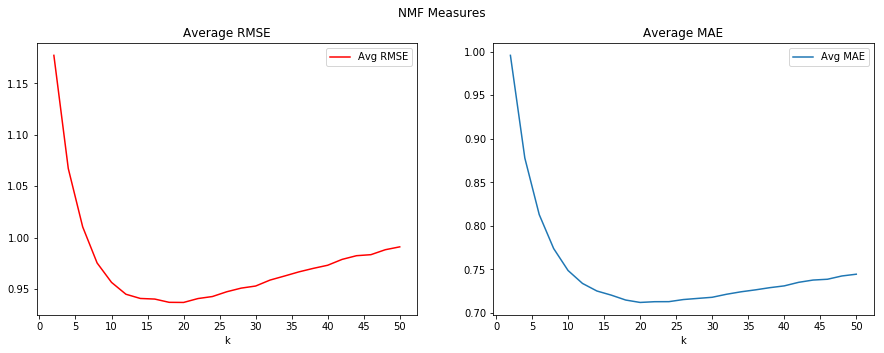

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
fig.set_figheight(5)
fig.suptitle("NMF Measures")
df_nmf_measures[['Avg RMSE']].plot(ax=axes[0], title="Average RMSE", xticks=np.linspace(0,50,11), color='red')
_ = df_nmf_measures[['Avg MAE']].plot(ax=axes[1], title="Average MAE", xticks=np.linspace(0,50,11))

<h1>Question 18</h1>

In [6]:
df_nmf_measures.idxmin()

Avg RMSE    20.0
Avg MAE     20.0
dtype: float64

In [9]:
from itertools import chain
movies_df = pd.read_csv('ml-latest-small/movies.csv')
s = set(chain.from_iterable(movies_df['genres'].str.split('|').tolist()))
print("Number of Genres: %d" %len(s))

Number of Genres: 20


<p>From the results, the best k that gives minimum average RMSE is 20. The best k that gives minimum average MAE is 20.</p>
<p>The number of movie genres is 20, the optimal number of latent factor is equal to the number of movie genres.</p>